# Applied Machine Learning - Task 1
The task is to build a model that predicts the sale price of a house based on the Ames Data Set. 
  
In the following section the data is loaded and investigated. 

In [123]:
import pandas as pd
import numpy as np

In [124]:
data = pd.read_csv('data/ames.csv')
data.head(5)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [125]:
data.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.647782,10147.921843,1971.356314,1984.266553,101.096928,4.177474,49.705461,559.071672,1051.255631,1159.557679,...,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,-93.642897,42.034482
std,33.499441,7880.017759,30.245361,20.860286,178.634545,2.233372,169.142089,439.540571,440.968018,391.890885,...,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,0.025700,0.018410
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-93.693153,41.986498
25%,43.000000,7440.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,-93.660217,42.022088
50%,63.000000,9436.500000,1973.000000,1993.000000,0.000000,3.000000,0.000000,465.500000,990.000000,1084.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,-93.641806,42.034662
75%,78.000000,11555.250000,2001.000000,2004.000000,162.750000,7.000000,0.000000,801.750000,1301.500000,1384.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,-93.622113,42.049853
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,-93.577427,42.063388


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

# Preprocessing of the Data
The data is split into a test and a training set and further split into the features and the target variable. Lastly column selectors for the categorical and numerical columns are created.

In [127]:
train_data, test_data = data.loc[:1999], data.loc[1999:]
X_train = train_data.drop('Sale_Price', axis=1)
y_train = train_data['Sale_Price']

X_test = test_data.drop('Sale_Price', axis=1)
y_test = test_data['Sale_Price']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 80), (2000,), (931, 80), (931,))

In [128]:
from sklearn.compose import make_column_selector

cat_columns= make_column_selector(dtype_include=object)
num_columns= make_column_selector(dtype_include=np.number)

print(cat_columns(X_train))
print(num_columns(X_train))

['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature', 'Sale_Type', 'Sale_Condition']
['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', '

# Model Training
In this section firstly the preprocessing pipeline is built for the models with Simple Imputation for the numerical and categorical columns. Furthermore, a Standard Scaler is used for the numerical columns and a One Hot Encoder for the categorical columns. Then 4 Models are selected for the ensemble model. The Linear Regression, Random Forest Regressor, Support Vector Regressor and the Gradient Boosting Regressor. Then the preprocessor and the models are combined into an sklearn model for a ensemble model. Lastly the model is fitted.

In [129]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns(X_train)),
        ('cat', cat_pipeline, cat_columns(X_train))
    ]
)


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

stacking_regressor = StackingRegressor(
    estimators=[
        ('LinearRegression', LinearRegression()),
        ('rf', RandomForestRegressor(random_state=42)),
        ('SVR', SVR()),
        ('gbr', GradientBoostingRegressor(random_state=42))
    ],
    final_estimator=GradientBoostingRegressor(random_state=42))

In [131]:
from skimage.metrics import mean_squared_error
from sklearn.metrics import r2_score

pipeline = make_pipeline(preprocessor, stacking_regressor, verbose=True)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 2.6min


## Displaying the results
The model is evaluated with the mean squared error, the R2 score and the cross-validated R2 score for later comparison and displayed in the following section.

In [132]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 823390939.8271835
R2 Score: 0.860895097331988


In [133]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.5min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.6min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.6min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.4min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.5min


In [134]:
print(f'Cross Validation R2 Score: {round(scores.mean(),2)} ±{round(scores.std(),2 )} ')

Cross Validation R2 Score: 0.86 ±0.11 


## Visualizing the results
The results are visualized with a Seaborn Jointplot and a Seaborn Residualplot.
The jointplot is a scatterplot with histograms on the sides and a regression line through the scatterplot, as well as a trendline through the histograms.

Sources for Visualization:  
[Seaborn Example Library](https://seaborn.pydata.org/examples/regression_marginals.html)

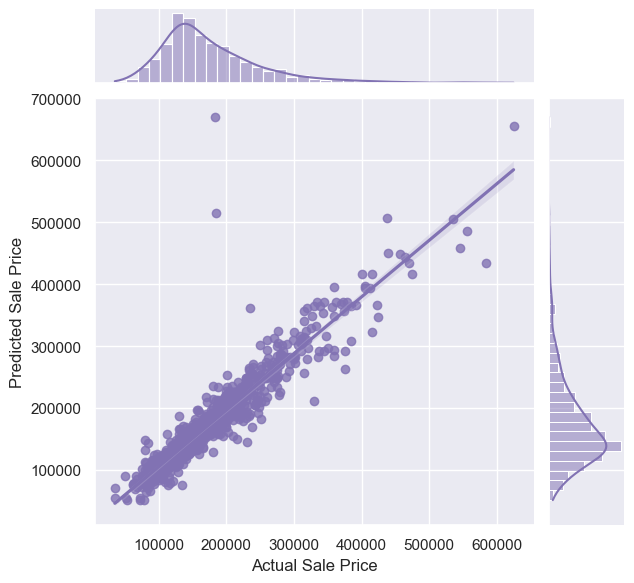

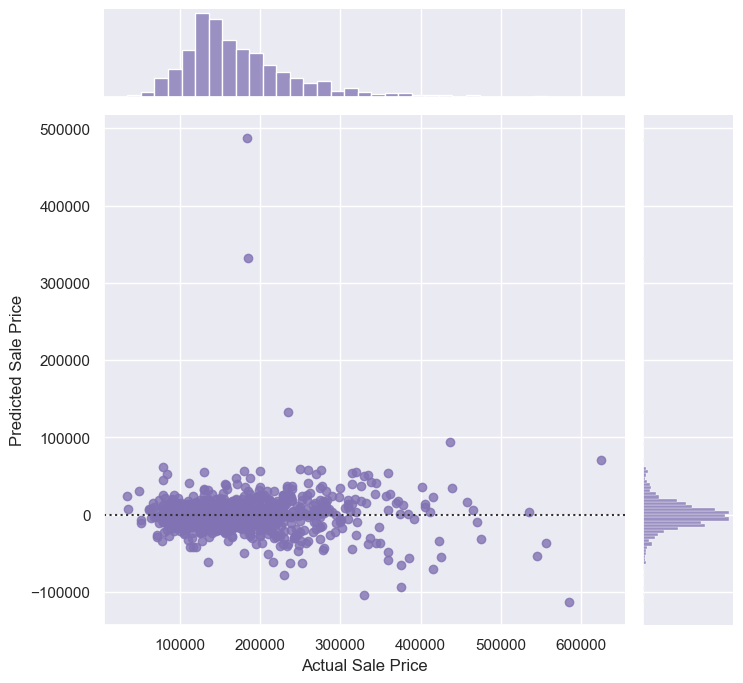

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

def plots(pred_values):
    sns.jointplot(x=y_test, kind="reg", y=pred_values, color="m", ci=95)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.show()
    sns.jointplot(x=y_test, y=pred_values,
                  kind="resid",
                  color="m", height=7)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.show()
    
plots(y_pred)

# Hyperparameter Tuning with GridSearchCV
In the following section the hyperparameters are fine-tuned with an cross-validated approach. Due to hardware limitations only a subset of the hyperparameters will be tuned. Other suggested hyperparameters are commented out.  
  
Sources for Hyperparameter Tuning:  
[SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)  
[RFR & GBR](https://stackoverflow.com/questions/69269334/hyperparameter-tuning-for-stackingregressor-sklearn)  

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'stackingregressor__rf__n_estimators': [50, 75], # 100
   # 'stackingregressor__rf__max_depth': [5, 10, 20], 
    'stackingregressor__gbr__n_estimators': [50, 75], # 100
    #'stackingregressor__gbr__max_depth': [3, 5, 10],
    'stackingregressor__final_estimator__n_estimators': [50, 75 ], # 100
    #'stackingregressor__final_estimator__max_depth': [3, 5, 10],
    'stackingregressor__SVR__C': [1, 10], # 25
    #'stackingregressor__SVR__epsilon': [1e-3, 1e-2, 1e-1, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_ft = best_model.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.2s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 2.8min


## Displaying the results of the hyperparameter tuning
The results of the hyperparameter tuning with the best parameters and estimators from the analysis are displayed. To compare the results of the hyperparameter tuning with the previous ones  the same metrics are calculated (The Mean Squared Error, the R2 Score and the cross-validated R2 Score). All metrics show that the hyperparameter tuning increased the performance of the model.



In [150]:
print("Best Parameters \n")
print(grid_search.best_params_)
print("Best Estimator \n")
print(grid_search.best_estimator_)

Best Parameters 

{'stackingregressor__SVR__C': 1, 'stackingregressor__final_estimator__n_estimators': 50, 'stackingregressor__gbr__n_estimators': 75, 'stackingregressor__rf__n_estimators': 75}
Best Estimator 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Lot_Frontage', 'Lot_Area',
                                                   'Year_Built',
                                                   'Year_Remod_Add',
                                                   'Mas_Vnr_Area',
                                                   'BsmtFin_SF_1',
     

In [152]:
print("Results")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ft))
print("R2 Score:", r2_score(y_test, y_pred_ft))

Results
Mean Squared Error: 709326332.7698152
R2 Score: 0.8801653434509341


In [153]:
scores = cross_val_score(best_model, X_train, y_train, cv=5)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.7min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.8min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.5min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.6min
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline] . (step 2 of 2) Processing stackingregressor, total= 1.5min


In [154]:
print(f'Cross Validation R2 Score: {round(scores.mean(),2)} ±{round(scores.std(),2 )} ')

Cross Validation R2 Score: 0.87 ±0.1 


## Visualizing the results of the hyperparameter tuning
The results are visualized in the same way.

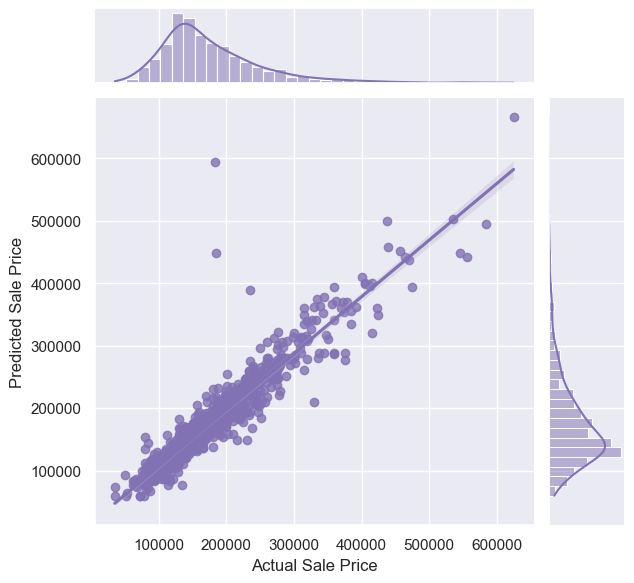

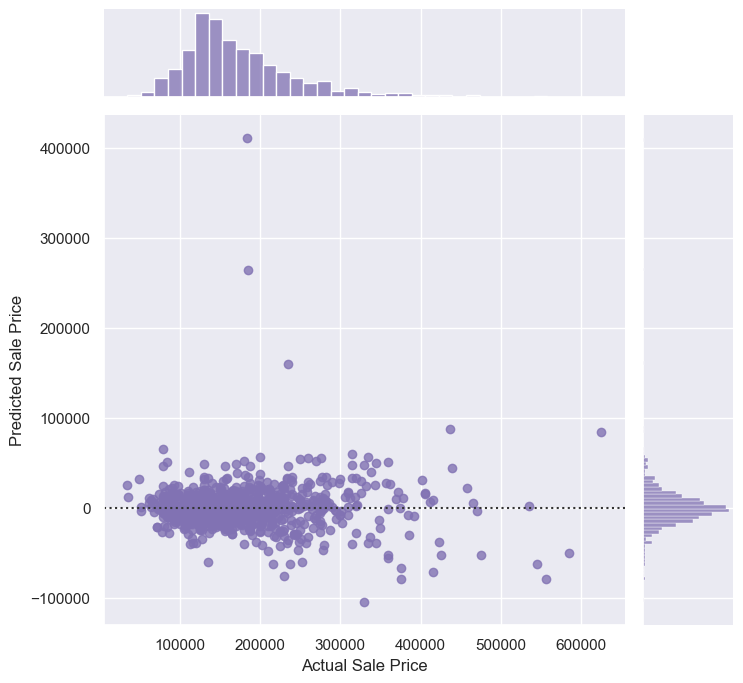

In [155]:
plots(y_pred_ft)